In [1]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
import pandas as pd
import matplotlib as plt
import re

In [2]:
# Get data from URL with requests.get
ua = UserAgent()

URL = 'https://www.nfl.com/stats/player-stats/'
page = requests.get(URL, headers={'User-Agent': ua.chrome})

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find('table')
table_data = table.find_all('tr')

In [3]:
# Getting all the headings
headings = []
for th in table_data[0].find_all("th"):
    headings.append(th.text.replace('\n', ' ').strip())

# Getting the actual stats
table_stats = []
for tr in table.tbody.find_all("tr"):
    t_row = {}

    for td, th in zip(tr.find_all("td"), headings):
        t_row[th] = td.text.replace('\n', '').strip()
    table_stats.append(t_row)

In [4]:
# Converting to pandas df
stats_df = pd.DataFrame(table_stats)
print(stats_df)

# Convert all stats (but not Player Names) to numeric for data analysis
cols = stats_df.columns
stats_df[cols[1:]] = stats_df[cols[1:]].apply(pd.to_numeric, errors='coerce')

# Writing to CSV
stats_df.to_csv('NFL-Stats.csv')

                Player Pass Yds Yds/Att  Att  Cmp  Cmp %  TD INT   Rate  1st  \
0       Deshaun Watson     4823     8.9  544  382  0.702  33   7  112.4  221   
1      Patrick Mahomes     4740     8.1  588  390  0.663  38   6  108.2  238   
2            Tom Brady     4633     7.6  610  401  0.657  40  12  102.2  233   
3            Matt Ryan     4581     7.3  626  407   0.65  26  11   93.3  242   
4           Josh Allen     4544     7.9  572  396  0.692  37  10  107.2  228   
5       Justin Herbert     4336     7.3  595  396  0.666  31  10   98.3  216   
6        Aaron Rodgers     4299     8.2  526  372  0.707  48   5  121.5  216   
7         Kirk Cousins     4265     8.3  516  349  0.676  35  13    105  212   
8       Russell Wilson     4212     7.5  558  384  0.688  40  13  105.1  213   
9        Philip Rivers     4169     7.7  543  369   0.68  24  11     97  200   
10          Derek Carr     4103     7.9  517  348  0.673  27   9  101.4  193   
11    Matthew Stafford     4084     7.7 

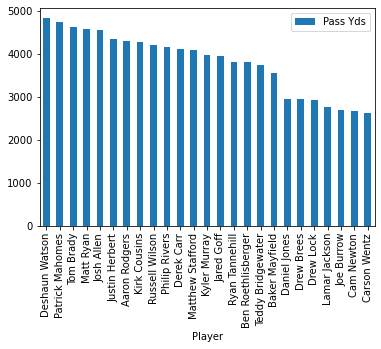

In [5]:
# Example of visualization
stats_df.plot(x='Player', y='Pass Yds', kind='bar')

In [6]:
# Using RegEx (find stat categories with two-digit integers in them)
pattern = re.compile(r'[0-9]{2}')
matches = []
for i in range(0,len(headings)):
    matches.append(pattern.findall(headings[i]))
print(matches)

[[], [], [], [], [], [], [], [], [], [], [], ['20'], ['40'], [], [], []]
